<a href="https://colab.research.google.com/github/Mubasshir2597/Applied_A.I_2023/blob/main/British_Airways_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#   

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [17]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re

In [18]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

Name = []
reviews = []
SeatType = []
Recommend = []
Date=[]
Destination = []

# Loop through each page of reviews
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')

    # Extract names
    for para in parsed_content.find_all("span", {"itemprop": "name"}):
        Name.append(para.get_text())

    # Extract reviews
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())

    # Extract seat types
    for para in parsed_content.find_all("tr"):
        if para.find("td", {"class": "review-rating-header cabin_flown"}, text="Seat Type"):
            SeatType.append(para.get_text().replace("Seat Type", ""))

    # Extract recommendation scores
    for para in parsed_content.find_all("table", {"class": "review-ratings"}):
        rec = para.find('td', {'class': ['review-value rating-yes', 'review-value rating-no']})
        if rec is not None:
            Recommend.append(rec.string.strip()[0])
            
    # Extract Date of the review
    for para in parsed_content.find_all("time", {"itemprop": "datePublished"}):
        Date.append(para.get_text())
    

print(f"   ---> {len(Name)} total names")
print(f"   ---> {len(reviews)} total reviews")
print(f"   ---> {len(SeatType)} total Seat Type")
print(f"   ---> {len(Recommend)} total Recommendation")
print(f"   ---> {len(Date)} total Date")

Scraping page 1


<ipython-input-18-bd799e9302a0>:37: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  if para.find("td", {"class": "review-rating-header cabin_flown"}, text="Seat Type"):


Scraping page 2
Scraping page 3
Scraping page 4
Scraping page 5
Scraping page 6
Scraping page 7
Scraping page 8
Scraping page 9
Scraping page 10
   ---> 1000 total names
   ---> 1000 total reviews
   ---> 1000 total Seat Type
   ---> 1000 total Recommendation
   ---> 1000 total Date


In [19]:
# Create a DataFrame with the collected data
df = pd.DataFrame({
    "name": Name,
    "reviews": reviews,
    "seat_type": SeatType,
    "recommended": Recommend,
    "date_review": Date
})

# Check the shape of the DataFrame
print(f"Shape of the DataFrame: {df.shape}")

Shape of the DataFrame: (1000, 5)


In [20]:
df.head()

,name,reviews,seat_type,recommended,date_review
0,Jason Wickert,✅ Trip Verified | I am already in Portugal so...,Business Class,n,6th May 2023
1,S Dasirou,✅ Trip Verified | Terrible. Avoid this airlin...,Economy Class,n,6th May 2023
2,Alexander George,✅ Trip Verified | Despite being a gold member...,Economy Class,n,1st May 2023
3,G Jones,Not Verified | Regarding the aircraft and seat...,Business Class,n,28th April 2023
4,Michelle Morgan,Not Verified | I travelled with British Airway...,Economy Class,n,26th April 2023


In [21]:
df['reviews']

0      ✅ Trip Verified |  I am already in Portugal so...
1      ✅ Trip Verified |  Terrible. Avoid this airlin...
2      ✅ Trip Verified |  Despite being a gold member...
3      Not Verified | Regarding the aircraft and seat...
4      Not Verified | I travelled with British Airway...
                             ...                        
995    ✅ Trip Verified |  Johannesburg to Heathrow. B...
996    ✅ Trip Verified |  The queue for bag drop was ...
997    ✅ Trip Verified |  British Airways changed pla...
998    ✅ Trip Verified |  Mumbai to Edinburgh via Lon...
999    ✅ Trip Verified |  Mumbai to London Heathrow. ...
Name: reviews, Length: 1000, dtype: object

In [22]:
# Split reviews on | and return the last element.
df["reviews"] = df["reviews"].apply(lambda x: x.split("|", 1)[-1] if "| " in x else x)

In [23]:
# Remove ordinal indicator from date strings
df["date_review"] = df["date_review"].apply(lambda x: re.sub(r'\b(\d+)(st|nd|rd|th)\b', r'\1', x))

# Convert date strings to datetime format
df["date_review"] = pd.to_datetime(df["date_review"], format="%d %B %Y")

In [24]:
df.head()

,name,reviews,seat_type,recommended,date_review
0,Jason Wickert,I am already in Portugal so contacted them t...,Business Class,n,2023-05-06
1,S Dasirou,Terrible. Avoid this airline. It’s now becom...,Economy Class,n,2023-05-06
2,Alexander George,"Despite being a gold member, the British Air...",Economy Class,n,2023-05-01
3,G Jones,Regarding the aircraft and seat: The business...,Business Class,n,2023-04-28
4,Michelle Morgan,I travelled with British Airways from Sweden ...,Economy Class,n,2023-04-26


In [26]:
import re
import nltk
nltk.download('stopwords', quiet=True)
nltk.download('wordnet', quiet=True)
nltk.download('omw-1.4', quiet=True)
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [27]:
def clean_review(text):
    # Removes all special characters and numericals leaving the alphabets
    text = re.sub('[^A-Za-z]+', ' ', str(text))
    
    # Convert all characters to lowercase
    text = text.lower()
    
    # Tokenize each review
    tokens = nltk.word_tokenize(text)
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]
    
    # Lemmatize each word in each review
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    
    # Combine the cleaned tokens back into a string
    cleaned_text = ' '.join(tokens)
    
    return cleaned_text

In [28]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [29]:
# Cleaning the text in the review column
df['cleaned reviews'] = df['reviews'].apply(clean_review)
df.head()

,name,reviews,seat_type,recommended,date_review,cleaned reviews
0,Jason Wickert,I am already in Portugal so contacted them t...,Business Class,n,2023-05-06,already portugal contacted today cancelled ret...
1,S Dasirou,Terrible. Avoid this airline. It’s now becom...,Economy Class,n,2023-05-06,terrible avoid airline becoming regular practi...
2,Alexander George,"Despite being a gold member, the British Air...",Economy Class,n,2023-05-01,despite gold member british airway staff heath...
3,G Jones,Regarding the aircraft and seat: The business...,Business Class,n,2023-04-28,regarding aircraft seat business class seat fl...
4,Michelle Morgan,I travelled with British Airways from Sweden ...,Economy Class,n,2023-04-26,travelled british airway sweden los angeles vi...


In [30]:
df[["reviews", "cleaned reviews"]]

,reviews,cleaned reviews
0,I am already in Portugal so contacted them t...,already portugal contacted today cancelled ret...
1,Terrible. Avoid this airline. It’s now becom...,terrible avoid airline becoming regular practi...
2,"Despite being a gold member, the British Air...",despite gold member british airway staff heath...
3,Regarding the aircraft and seat: The business...,regarding aircraft seat business class seat fl...
4,I travelled with British Airways from Sweden ...,travelled british airway sweden los angeles vi...
...,...,...
995,Johannesburg to Heathrow. British Airways ar...,johannesburg heathrow british airway u proud r...
996,The queue for bag drop was massive and did n...,queue bag drop massive move good min senior pe...
997,British Airways changed plane and consequent...,british airway changed plane consequently seat...
998,Mumbai to Edinburgh via London. I'm quite su...,mumbai edinburgh via london quite surprised re...


In [32]:
!pip install vaderSentiment


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 4.0 MB/s eta 0:00:00


In [33]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [34]:
analyzer = SentimentIntensityAnalyzer()

# function to calculate vader sentiment and analysis
def vader_sentiment_analysis(review):
    vs = analyzer.polarity_scores(review)
    compound = vs['compound']
    sentiment = 'Positive' if compound >= 0.5 else 'Negative' if compound < 0 else 'Neutral'
    return compound, sentiment

df[['Compound Score', 'Sentiment']] = df['cleaned reviews'].apply(vader_sentiment_analysis).tolist()

In [35]:
df.head()

,name,reviews,seat_type,recommended,date_review,cleaned reviews,Compound Score,Sentiment
0,Jason Wickert,I am already in Portugal so contacted them t...,Business Class,n,2023-05-06,already portugal contacted today cancelled ret...,-0.3612,Negative
1,S Dasirou,Terrible. Avoid this airline. It’s now becom...,Economy Class,n,2023-05-06,terrible avoid airline becoming regular practi...,-0.8519,Negative
2,Alexander George,"Despite being a gold member, the British Air...",Economy Class,n,2023-05-01,despite gold member british airway staff heath...,0.8555,Positive
3,G Jones,Regarding the aircraft and seat: The business...,Business Class,n,2023-04-28,regarding aircraft seat business class seat fl...,0.8939,Positive
4,Michelle Morgan,I travelled with British Airways from Sweden ...,Economy Class,n,2023-04-26,travelled british airway sweden los angeles vi...,-0.8832,Negative


In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [37]:
sentiment_counts = df['Sentiment'].value_counts()
print(sentiment_counts)

Positive    513
Negative    378
Neutral     109
Name: Sentiment, dtype: int64


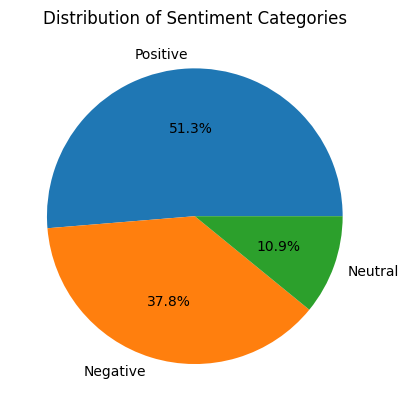

In [38]:
# Get the counts of each sentiment category
counts = df['Sentiment'].value_counts()

# Create a pie chart
plt.pie(counts, labels=counts.index, autopct='%1.1f%%')
plt.title('Distribution of Sentiment Categories')
plt.show()

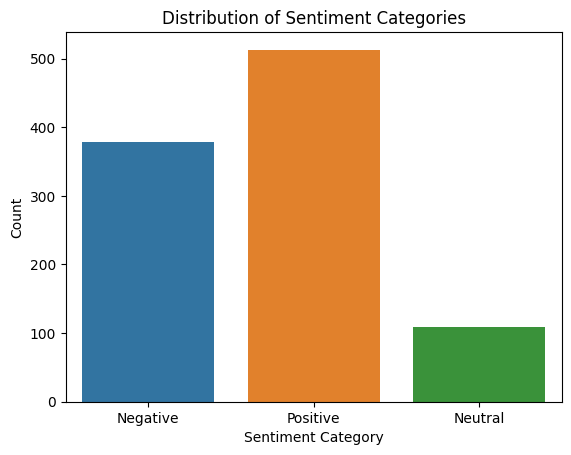

In [39]:
# Visualize the distribution of sentiment categories in the dataset
sns.countplot(x='Sentiment', data=df)
plt.title('Distribution of Sentiment Categories')
plt.xlabel('Sentiment Category')
plt.ylabel('Count')
plt.show()

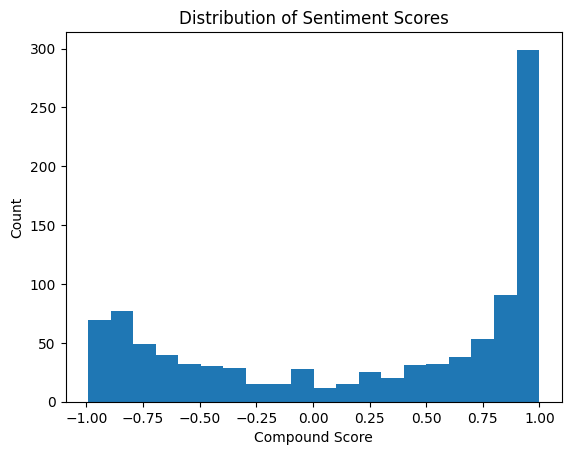

In [40]:
# create a histogram of the Compound Score in the data frame.
plt.hist(df['Compound Score'], bins=20)
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Compound Score')
plt.ylabel('Count')
plt.show()

In [41]:
df['Length'] = df['cleaned reviews'].apply(len)

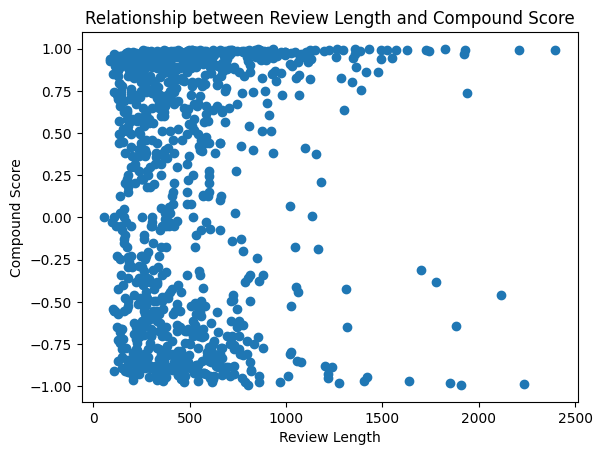

In [42]:
plt.scatter(df['Length'], df['Compound Score'])
plt.title('Relationship between Review Length and Compound Score')
plt.xlabel('Review Length')
plt.ylabel('Compound Score')
plt.show()

In [43]:
seat_type_counts = df["seat_type"].value_counts()
print(seat_type_counts)

Economy Class      553
Business Class     322
Premium Economy     90
First Class         35
Name: seat_type, dtype: int64


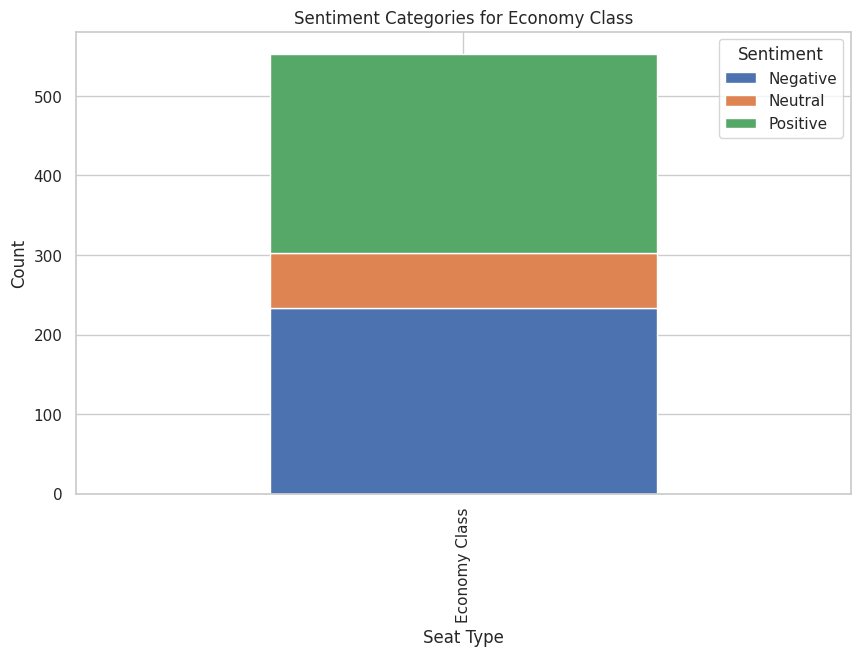

In [44]:
# Filter the DataFrame to include only rows with 'Economy Class' seat type
economy_df = df[df['seat_type'] == 'Economy Class']

# Create a pivot table with sentiment categories by seat type
pivot = pd.pivot_table(economy_df, values='reviews', index='seat_type', columns='Sentiment', aggfunc=len)

# Create a stacked bar plot
sns.set(style='whitegrid')
pivot.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Sentiment Categories for Economy Class')
plt.xlabel('Seat Type')
plt.ylabel('Count')
plt.legend(title='Sentiment', loc='upper right')
plt.show()

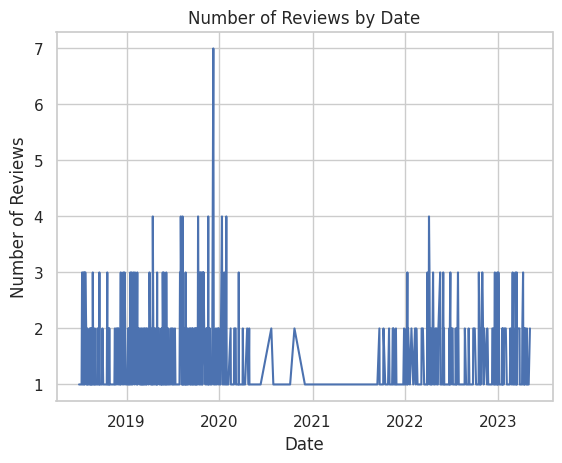

In [45]:
review_counts = df.groupby('date_review').size().reset_index(name='count')
plt.plot(review_counts['date_review'], review_counts['count'])
plt.title('Number of Reviews by Date')
plt.xlabel('Date')
plt.ylabel('Number of Reviews')
plt.show()

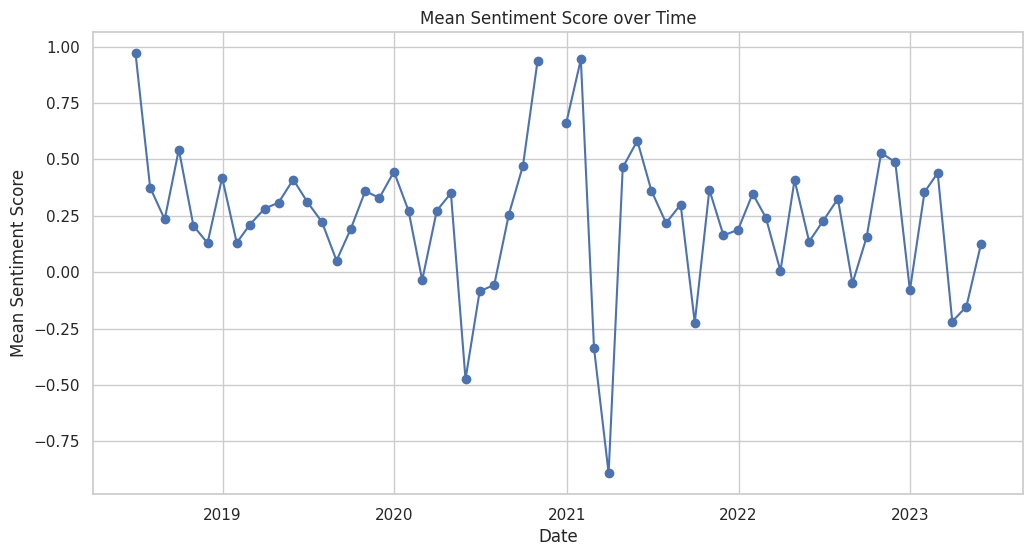

In [46]:
# Group the data by date and calculate the mean sentiment score for each date
df_date = df.groupby('date_review')['Compound Score'].mean().reset_index()

# Set the date column as the index
df_date.set_index('date_review', inplace=True)

# Resample the data by month and calculate the mean sentiment score for each month
df_month = df_date.resample('M').mean()

# Create a line plot of sentiment scores over time
plt.figure(figsize=(12,6))
plt.plot(df_month.index, df_month['Compound Score'], marker='o')
plt.xlabel('Date')
plt.ylabel('Mean Sentiment Score')
plt.title('Mean Sentiment Score over Time')
plt.show()


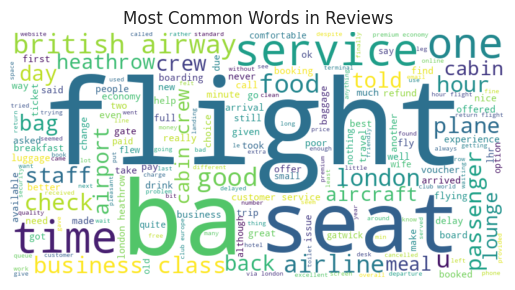

In [47]:
words = ' '.join(df['cleaned reviews'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(words)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Reviews')
plt.show()